### Computational Economics
Alexander Skorobogatov

# Topic 4.1. An optimal consumption/saving model

The setup of the model:
1. An individual earns interest in the account $r$. Hence, his saving grows in line with the formula:

$$\dot{x} = rx - c$$



2. His lifetime is finite $T$  
3. Let the instantaneous utility function satisfying $u' > 0, u''<0$ be

$$U(c(t))=\ln c(t)$$

4. The intertemporal preference is given by parameter $\rho$
5. Then the lifetime utility is as follows

$$u = \int_{0}^{T} \exp(-\rho t)Udt$$

### The problem
The individual wishes to  
$$ \max \int_{0}^{T} \exp(-\rho t) \ln c dt $$
subject to

$$\dot{x} = rx - c$$
$$x(0) = x_0$$
$$x(T) = b$$

### Solution
A step-by-step procedure:  
1. Define Hamiltonian and constraints
2. First order condition (FOC) for the control variable $c$, solve for it
3. FOC for the state variable
4. Resulting two equation differential system (FOC2 and st1 with the use of FOC1)
5. The solution of DE1
6. Rewrite DE2:    
    plug the solution into DE2    
    solve for the solution  
    multiply both sides by int. factor exp(-rt)  
7. Integrate both sides of the rewritten solution
8. Solve for x(t)
9. Using the constraints for the second boundary conditions solve for C2
10. Using the constraint for the first boundary condition and the solution for C2 solve for C1
11. Plug the solutions for C1 and C2 in the solution for x(t)

### The problem and the general solution

In [33]:
from IPython import get_ipython;
get_ipython().magic('reset -sf')

C:\Users\Alex\AppData\Local\Temp\ipykernel_13172\2091633686.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [34]:
#pip install sympy
from sympy import diff, symbols, ln, Eq, solve, dsolve, Function, Derivative, exp, integrate, powsimp, simplify

# Introduce symbols
r, t, rho = symbols('r t rho')
# Introduce functions
c = Function('c')(t)
x = Function('x')(t)
mu = Function('mu')(t)

# 1. Hamiltonian
H = ln(c) + mu*(r*x - c)
# subject to
st1 = r*x - c

# 2. FOC1 for the control variable c
foc1 = Eq(diff(H,c), 0).simplify()
c_s = solve(foc1,c)[0] # solve for c
eq = Eq(c,c_s)
eq

Eq(c(t), 1/mu(t))

In [35]:
# 3. FOC for the state variable x
mut = mu.diff()

foc2 = Eq(diff(H,x), rho*mu - mut).simplify()
mut_s = solve(foc2,mut)[0]
de1 = Eq(mut,mut_s)

# The first resultant de
de1

Eq(Derivative(mu(t), t), (-r + rho)*mu(t))

In [36]:
# 4. Plug foc1 in the constraint st1
xt = x.diff()
xt2 = st1.subs(c, c_s)
de2 = Eq(xt, xt2)

# the second resultant de:
de2

Eq(Derivative(x(t), t), r*x(t) - 1/mu(t))

Thus, the system of differential equations to solve for optimal path for saving is given by de1 and de2:
$$\dot{\mu} = \mu(\rho - r)$$
$$\dot{x} = rx - \mu^{-1}$$

In [37]:
# 5. Solve de1
ds1 = dsolve(Derivative(mu) - mu*(rho-r), mu)
ds_r = solve(ds1,mu)[0]
ds1

Eq(mu(t), C1*exp(t*(-r + rho)))

In [38]:
# 6. Rewrite de2
plug = de2.subs(mu,ds_r) # plug the solution
int_factor = exp(-r*t)

lhs = -solve(plug,ds_r)[0]**(-1)*int_factor # left-hand side: times -1, times int. factor, power of -1
rhs = powsimp(-solve(ds1,mu)[0]**(-1)*int_factor) # Right-hand side: the same

ds2 = Eq(lhs,rhs) # solve for the solution and multiply by int. factor
ds2

Eq((-r*x(t) + Derivative(x(t), t))*exp(-r*t), -exp(-rho*t)/C1)

In [39]:
# Integrate rhs and simplify
C1, C2 = symbols('C1 C2') # introduce the integration constants
rhs_integ = (simplify(integrate(rhs,(t,0,t),
                                conds='separate'))+C2)*int_factor**-1 # integrate rhs and solve for x moving the int.factor
solution1 = Eq(x,rhs_integ)
solution1

Eq(x(t), (C2 + (1 - exp(rho*t))*exp(-rho*t)/(C1*rho))*exp(r*t))

Thus, $x(t)$ given by the solution1 is an optimal path of saving  

### Private solution with the account of boundary conditions

In [40]:
# 9. Solution for C2
x0, xT, T = symbols('x0 xT T')
sol2 = rhs_integ.subs(t,0)
sol2 = x0
sol2

x0

In [41]:
# 10. Solution for C1
sol1 = rhs_integ.subs({t:T,C2:sol2})
sol1 = Eq(xT,sol1)
sol1 = solve(sol1, C1)[0]
sol1

(-exp(T*r) + exp(T*(r + rho)))*exp(-T*rho)/(rho*(x0*exp(T*r) - xT))

In [42]:
# 11. Plug the solutions for constraints
x_sol = rhs_integ.subs({C1:sol1,C2:sol2})
x_sol

(x0 + (1 - exp(rho*t))*(x0*exp(T*r) - xT)*exp(T*rho)*exp(-rho*t)/(-exp(T*r) + exp(T*(r + rho))))*exp(r*t)

In [43]:
# From this derive consumption path
eq = eq.subs(mu,ds_r)
c_sol = eq.subs(C1,sol1)
c_sol

Eq(c(t), rho*(x0*exp(T*r) - xT)*exp(T*rho)*exp(-t*(-r + rho))/(-exp(T*r) + exp(T*(r + rho))))

In [44]:
# Savings
sav = st1.subs({x:x_sol,c:c_sol.rhs})
sav

r*(x0 + (1 - exp(rho*t))*(x0*exp(T*r) - xT)*exp(T*rho)*exp(-rho*t)/(-exp(T*r) + exp(T*(r + rho))))*exp(r*t) - rho*(x0*exp(T*r) - xT)*exp(T*rho)*exp(-t*(-r + rho))/(-exp(T*r) + exp(T*(r + rho)))

### Numerical examples

In [45]:
# Introduce the dictionary of parameters
param = [x0, xT, t, T, r, rho] # list of parameters
values = [100, 0, 12, 480, 0.01, 0.005] # list of their values

In [46]:
val = dict(zip(param,values))
print(x_sol.subs(val))
print(c_sol.rhs.subs(val))
print(sav.subs(val))

105.528569853666
0.583887337480517
0.471398361056139


In [47]:
# Check the impact the parameters on the resultant calculations
val2 = val.copy()
val2[xT] = 10000 # we want to leave a legacy
print(x_sol.subs(val2))

val2 = val.copy()
val2[t] = 240 # a half-life is gone
print(x_sol.subs(val2))

val2 = val.copy()
val2[T] = 252 # a shorter life
print(x_sol.subs(val2))

val2 = val.copy()
val2[r] = 0.1 # a righer return
print(x_sol.subs(val2))

val2 = val.copy()
val2[rho] = 0.05 # a higher preference of current consumption over future
print(x_sol.subs(val2))

111.471365090262
255.159213923753
103.583680536849
310.747821701279
61.8783391786936


In [48]:
# Form the table
c = []
x = []
s = []
for i in range(1,480+1):
    val[t] = i
    c.append(c_sol.rhs.subs(val))
    x.append(x_sol.subs(val))
    s.append(sav.subs(val))

In [49]:
# Compare saving variable with changes of capital
import numpy as np
li1 = np.array(x)[1:] - np.array(x)[:-1] # fd of capital
li2 = (np.array(s)[1:] + np.array(s)[:-1])/2 # mean of pairs of values of sav

In [50]:
arr1 = np.array([c,s,x]).T
arr1.shape

(480, 3)

In [51]:
arr2 = np.array([li1,li2]).T
arr2.shape

(479, 2)

In [52]:
arr2 = np.vstack([arr2,['NAN','NAN']])
arr2.shape

(480, 2)

In [53]:
import pandas as pd
col=['cons','sav','cap','d_cap1','d_cap2']
arr3 = np.concatenate((arr1, arr2),axis=1)
data = pd.DataFrame(arr3, columns=col).astype('float')
data

,cons,sav,cap,d_cap1,d_cap2
0,0.552641,0.451869,1.004510e+02,0.452748,0.452748
1,0.555411,0.453627,1.009037e+02,0.454507,0.454507
2,0.558195,0.455388,1.013582e+02,0.456270,0.456270
3,0.560993,0.457152,1.018145e+02,0.458036,0.458037
4,0.563805,0.458921,1.022726e+02,0.459806,0.459807
...,...,...,...,...,...
475,5.941447,-5.706150,2.352971e+01,-5.749704,-5.749790
476,5.971229,-5.793429,1.778000e+01,-5.837496,-5.837582
477,6.001160,-5.881735,1.194251e+01,-5.926320,-5.926407
478,6.031241,-5.971079,6.016188e+00,-6.016188,-6.016276


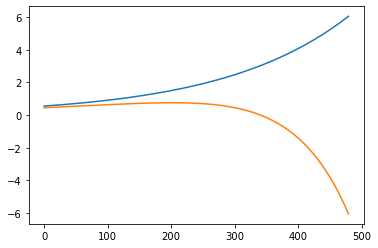

In [54]:
import matplotlib.pyplot as plt
plt.plot(data['cons'], label = "line 1")
plt.plot(data['sav'], label = "line 2")